# FindDefault (Credit Card Fraud Detection)

### A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
### It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 


# Step 1. Import Libraries

In [1281]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2. Load The Dataset

In [1286]:
# Loading dataset
df = pd.read_csv(r"C:\Users\MAMUN RASHID\Downloads\creditcard.csv")

# Step 3. Exploratory Data Analysis (EDA)

In [1289]:
# Display the top 5 row of dataframe
df_head = df.head()
print(df_head)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [1291]:
# Display the shape of dataframe
df_shape = df.shape
print(df_shape)

(284807, 31)


In [1293]:
# Checking missing values of dataframe
df_null = df.isnull().sum()
print(df_null)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [1295]:
# display the information about dataset
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [1297]:
# Summery statistics of data
df_summery = df.describe()
print(df_summery)

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [1299]:
# Display duplicate values
df_duplicates = df.duplicated().sum()
print(df_duplicates)

1081


In [1300]:
# Removing duplicate values
df_drop_duplicates = df.drop_duplicates(inplace = True)
print(df_drop_duplicates)

None


In [1303]:
# Display duplicate values again
df_duplicates = df.duplicated().sum()
print(df_duplicates)

0


In [1305]:
# check class distribution
print(df['Class'].value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


### Visualization For Class Distribution 

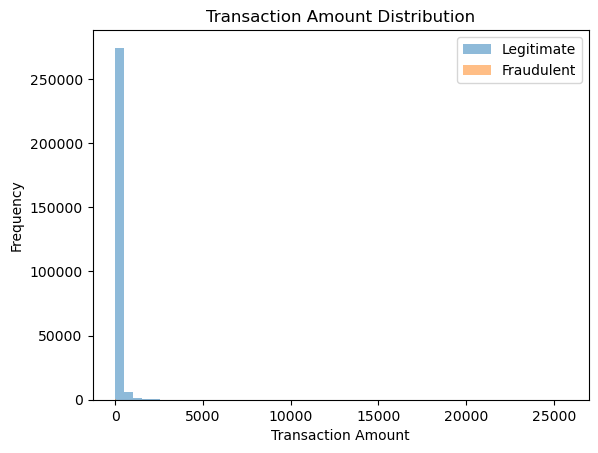

In [1310]:
df[df['Class'] == 0]['Amount'].plot.hist(bins=50, alpha=0.5, label='Legitimate')
df[df['Class'] == 1]['Amount'].plot.hist(bins=50, alpha=0.5, label='Fraudulent')
plt.legend()
plt.xlabel('Transaction Amount')
plt.title('Transaction Amount Distribution')
plt.show()

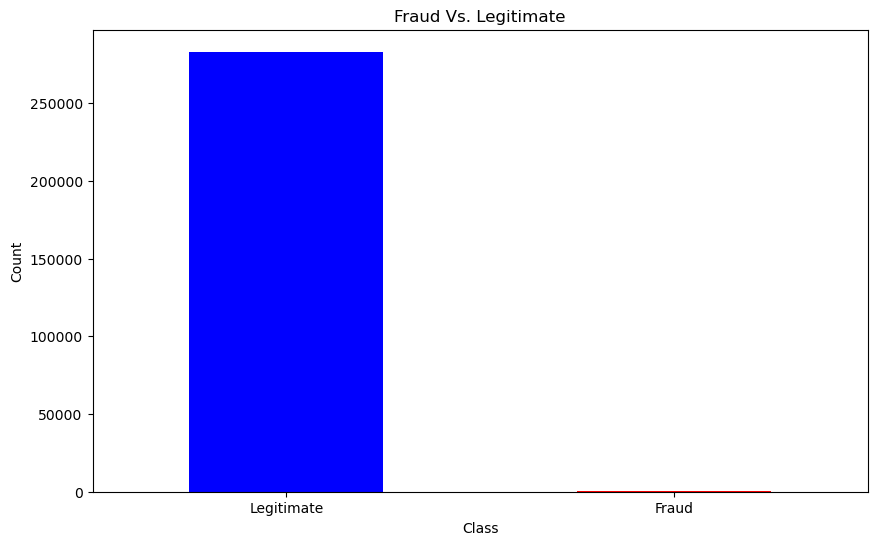

In [1312]:
# Visualize Fraud Vs. Legitimate transactions
plt.figure(figsize = (10, 6))
df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels = ['Legitimate', 'Fraud'], rotation = 0)
plt.ylabel('Count')
plt.title('Fraud Vs. Legitimate')
plt.show()

# Step 4. Data Cleaning

### Checking Outliers

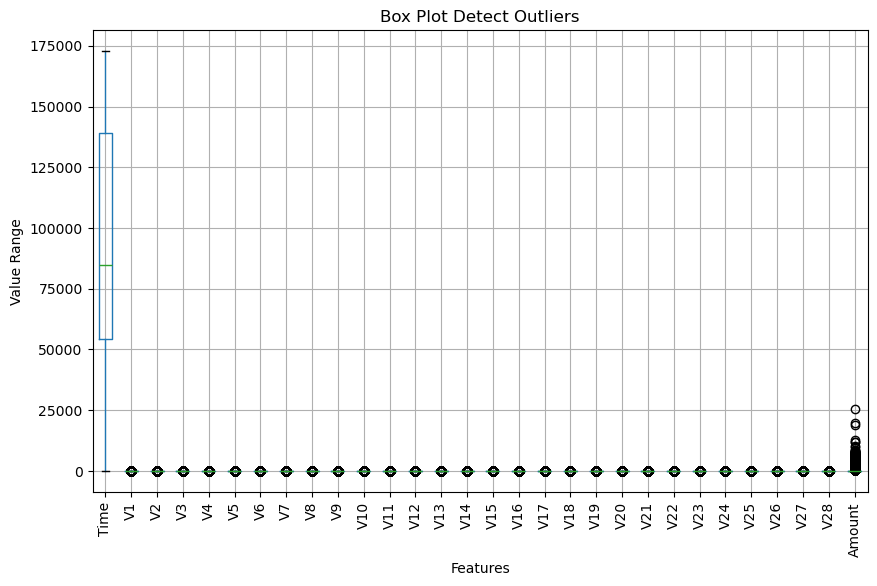

In [1316]:
plt.figure(figsize=(10, 6))

# Select columns except 'Class'
numerical_columns = df.drop(columns=['Class']).columns.tolist()

# Create box plots
df[numerical_columns].boxplot(rot=90)

plt.title("Box Plot Detect Outliers")
plt.xlabel("Features")
plt.ylabel("Value Range")
plt.show()

### Removing Outliers by using z-score

In [1319]:
from scipy import stats

# Threshold for Z-score
z_threshold = 3

# Filter out rows
df = df[(np.abs(stats.zscore(df[numerical_columns])) < z_threshold).all(axis=1)]

# Check new dataset
print("After removing outliers:", df.shape)

After removing outliers: (245844, 31)


# Step 5. Handling Class Imbalance

In [1322]:
# Separate Fraud and Legitimate Transaction 
df_legitimate = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]

In [1324]:
# Undersampling legitimate Transactions 
df_legitimate_sample = df_legitimate.sample(n=len(df_fraud), random_state= 42)

In [1326]:
# Combining undersampled Transactions
df_balance = pd.concat([df_legitimate_sample, df_fraud])

In [1328]:
# Suffling the data
df_balanced = df_balance.sample(frac= 1, random_state= 42).reset_index(drop = True)

In [1330]:
# Dsiplay Class distribution again
print(df_balanced['Class'].value_counts())

Class
1    48
0    48
Name: count, dtype: int64


# Step 6. Feature Engineering

In [1333]:
# Extracting hour of the day
df_balanced['Hour'] = (df_balanced['Time'] // 3600) % 24

In [1335]:
# Dropping Time column because it's no longer needed
df_balanced.drop(columns=['Time'], inplace = True)

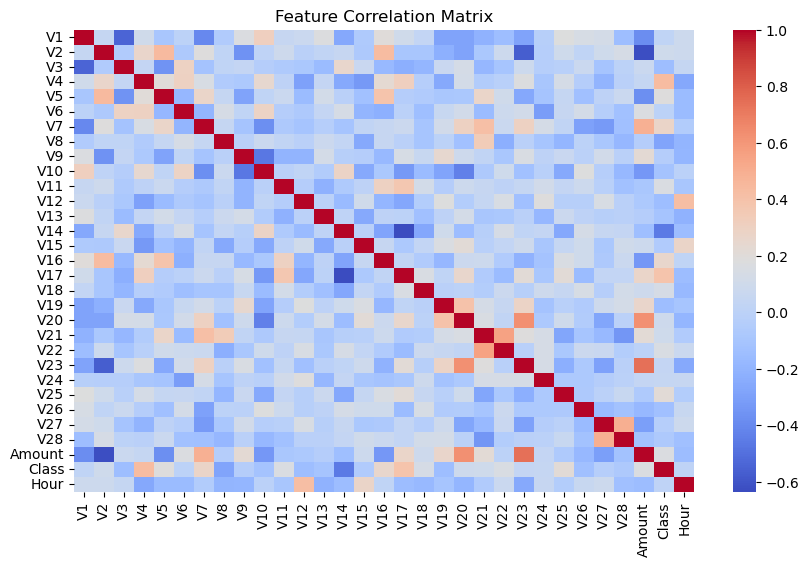

In [1337]:
# Check feature correlation matrix
plt.figure(figsize = (10, 6))
sns.heatmap(df_balanced.corr(), cmap = "coolwarm" , annot = False)
plt.title("Feature Correlation Matrix")
plt.show()

In [1339]:
df_balanced.skew()

V1       -0.367831
V2       -0.516102
V3       -0.545870
V4        0.242066
V5       -0.234480
V6        0.790288
V7        0.204867
V8       -2.082343
V9        0.017038
V10       0.037779
V11      -0.090185
V12      -1.041251
V13       0.005010
V14      -0.405714
V15      -0.230047
V16      -0.356308
V17       0.450195
V18       0.025262
V19       0.030270
V20       1.304297
V21      -0.172936
V22       0.354350
V23       2.174505
V24      -0.543778
V25      -0.243884
V26       0.721376
V27      -0.582474
V28      -0.388549
Amount    2.347204
Class     0.000000
Hour     -0.708084
dtype: float64

In [1341]:
# Log Transformation of Amount
df_balanced['Amount'] = np.log1p(df_balanced['Amount'])

In [1343]:
# Check feature again
print("Final Features:", df_balanced.columns)
df_balanced.head()

Final Features: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Hour'],
      dtype='object')


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,1.917827,0.951967,-2.059206,3.833998,1.668192,0.769826,0.232463,0.107941,-1.143646,0.541699,...,0.239994,-0.111916,-0.380576,0.370995,0.189117,-0.005823,-0.012105,2.323368,1,0.0
1,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,-1.242265,0.269562,...,1.196428,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,0.182322,1,22.0
2,0.196707,1.189757,0.704882,2.891388,0.045555,1.245730,-1.198714,-2.421616,-1.232089,0.324239,...,0.189311,-0.005524,-0.814708,0.400924,0.286281,0.135215,0.257315,0.565314,1,19.0
3,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,0.249311,...,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,3.042139,1,22.0
4,-1.663080,-1.121735,-0.016496,-1.527058,0.981759,-0.592211,-0.584642,0.613109,-1.434636,0.114891,...,0.826945,-0.116900,-0.777081,-0.184310,-0.281257,0.298585,-0.072137,3.931826,0,17.0


In [1345]:
# List of unnecessary columns to drop
unnecessary_columns = ["V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28"]

# Drop the unnecessary columns from df_balanced
df_balanced.drop(columns=unnecessary_columns, inplace=True)

# Verify the changes
print("Remaining Columns:", df_balanced.columns)

Remaining Columns: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'Amount',
       'Class', 'Hour'],
      dtype='object')


### Feature Scaling & Data Transform

In [1348]:
from sklearn.preprocessing import StandardScaler

# Standardize the Amount and Time Coloumns
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Display transformed data
print(df[['Time','Amount']].head())

       Time    Amount
0 -2.004757  0.766525
1 -2.004757 -0.556909
3 -2.004736  0.531256
4 -2.004715  0.049278
5 -2.004715 -0.548082


In [1350]:
# Saving processed data
df_balanced.to_csv("processed_data.csv", index=False)

print("Processed dataset saved successfully!")

Processed dataset saved successfully!


# Step 7. Splitting The Dataset & Model Selection

### Splitting The Dataset

In [1354]:
from sklearn.model_selection import train_test_split


# Define features
X = df_balanced.drop(columns=['Class']).values  
y = df_balanced['Class'].values  

# Check the shape (y should be 1D)
print("X shape:", X.shape)  
print("y shape:", y.shape)  

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X shape: (96, 22)
y shape: (96,)


## Training a Model

In [1357]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Step 8. Model Validation

### Model Evaluation

In [1361]:
# Check Performance Metrix
from sklearn.metrics import classification_report

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



### Model Improvement

In [1364]:
# RandomForest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1366]:
# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



# Step 9. Hyperparameter Tuning

In [1369]:
# Define hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],}

In [1371]:
# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [1372]:
# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


# Step 10. Model Interpretability

### Feature Importance for Logistic Regression

In [1377]:
# Ensure X_train is a DataFrame
X_train_df = pd.DataFrame(X_train, columns=df_balanced.drop(columns=['Class']).columns)

In [1379]:
# Get feature importance for Logistic Regression
feature_importance = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

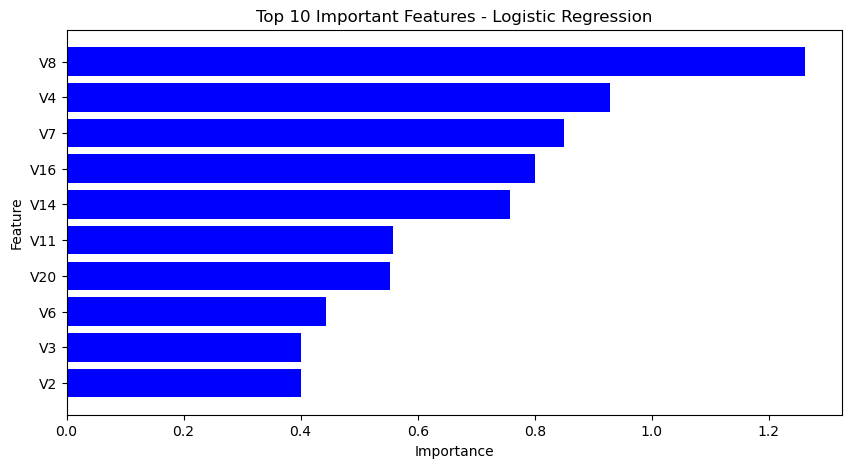

In [1381]:
# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10], color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features - Logistic Regression")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### Feature Importance for Random Forest

In [1266]:
# Get feature importance for Random Forest
importances = rf_model.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

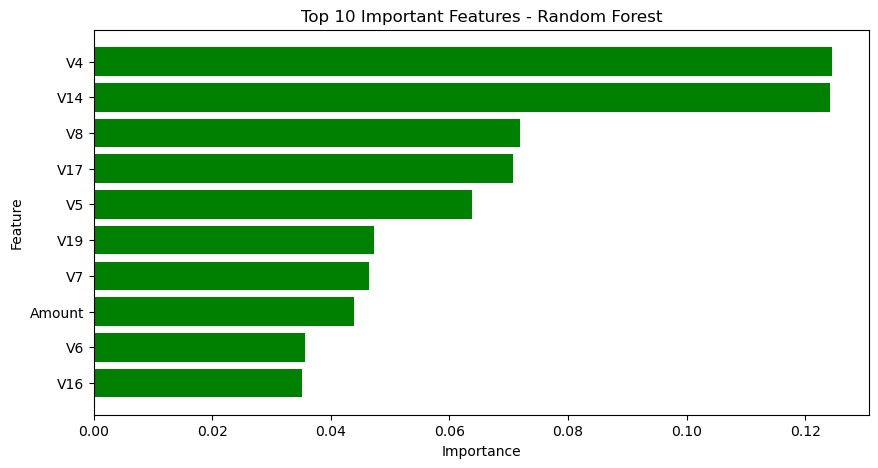

In [1268]:
# Plot feature importance for Random Forest
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_rf['Feature'][:10], feature_importance_rf['Importance'][:10], color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features - Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Model Deployment

In [1275]:
import joblib

# Save the best model
joblib.dump(grid_search.best_estimator_, "fraud_detector_machine.pkl")

print("Model saved successfully!")

Model saved successfully!
